# Clasificador Binario

## Librerías

In [1]:
!pip install fastai -Uq
!pip install timm

#Reiniciamos el entorno de ejecución automáticamente
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

     |████████████████████████████████| 197 kB 39.7 MB/s 
     |████████████████████████████████| 60 kB 9.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 431 kB 30.8 MB/s 


{'restart': True, 'status': 'ok'}

In [1]:
from fastai.vision.all import *

## Dataset

En este caso estamos usando el dataset que ha sido preprocesados mediante el método de recorte

In [2]:
!wget https://www.dropbox.com/s/o1eaoae59qgdo4i/Training_Set_Pre.zip?dl=0 --no-verbose -O train.zip
!wget https://www.dropbox.com/s/5od5cac9xhxlcwu/Test_Set_Pre.zip?dl=0 --no-verbose -O test.zip
!wget https://www.dropbox.com/s/gjz445xm4oddfus/Evaluation_Set_Pre.zip?dl=0 --no-verbose -O val.zip


2022-06-15 14:25:42 URL:https://ucfbd287039e385fb90df84922d2.dl.dropboxusercontent.com/cd/0/inline2/BnQrl2ryWTrFOxYW319awse5WhP9GJTFw3MnMyXxCecegEoB0dWCpU4j2mNvxFj1JTQIGvkM7UdE--k3fW8H-9U5FCp_0tABy8YHn6DyK2mOnzamuY0fuYHsMFqhKHQznxc9K53DRdb68ykjlFOVAhUQix4WmSJrqSa1cida2DAOWgExlwUw_s2PNTDxE-YFzX1an2GQx3dzdJDvZoa5u2oISXuOgeHyyGiYwcVvwWCbhR_E2snD5XuL10jJQmr5Viq3HH2q36B4s2LagQKEYGq7nZYDvNs1Uo2LRIRB4LbdRNJTD8yJ4eo75A6c4381sDVkfNcHzfeDLfvJnPb_SbzU_10ocQSydtfZfimBx9Xuz6rssXoxeOQGKhBf5KLxowg9OZ_PUIhCpljp9gukb61sa6Q3q_MIB4J33ijsJwZ9oA/file [138777773/138777773] -> "train.zip" [1]
2022-06-15 14:25:45 URL:https://uc45202ccfa4923deb24fd29ab26.dl.dropboxusercontent.com/cd/0/inline2/BnSONKfjOk-WxmqqwgIQzbEvBSW5WiaD6xgMwEgJkDoyhI9axbqWy0BRDlzjVRHColjmQW9q-Tu7Be929udBZxzopfbl3hnfk3cXstbKuUrGrJLmnJ-Y3mNp5dc1J0q21KAf1F7ysz9ZiyUAts4SJ-fJe8jxB_kMTguyw9yAfdAHmUMuCbJqfeIwXSF-sOHuFC79cINWCjFMbeb60nVIIFA4mluu91110YwoBtdEWIdfzw25UXrNF8iER_mee9byGV3TB2vIWzJ9F_q8iLcnJlFYIaOs6lfXvi6IylC18hExvxgzmEPHsMIwnaKB7omho7L

In [3]:
# !rm -rvf Training_Set_Pre
!unzip -qq train.zip #-qq no verbose
!unzip -qq test.zip
!unzip -qq val.zip

Tenemos que cambiar la estructura del dataset


```.
└── dataset
    ├── train
    │   ├── normal
    │   └── enfermedad
    ├── test
    │   ├── normal
    │   └── enfermedad
    └── validation
        ├── normal
        └── enfermedad
```

Para ello usaremos el archivo csv de cada conjunto para mover cada imagen a donde corresponda

In [4]:
#Train Normal y Enfermedad
trainN='dataset/train/normal'
trainE='dataset/train/enfermedad'

testN='dataset/test/normal'
testE='dataset/test/enfermedad'

valN='dataset/val/normal'
valE='dataset/val/enfermedad'

train='dataset/train'
test='dataset/test'
val='dataset/val'

!mkdir dataset

!mkdir '$train'
!mkdir '$test'
!mkdir '$val'

!mkdir "$trainN"
!mkdir "$trainE"

!mkdir "$testN"
!mkdir "$testE"

!mkdir "$valN"
!mkdir "$valE"

Creamos un path que apunte a la carpeta donde vamos a tener el dataset estructurado posteriormente:

In [5]:
path = Path('dataset/')

In [6]:
trainPath = Path('Training_Set_Pre/')
testPath  = Path('Test_Set_Pre/')
valPath  =  Path('Evaluation_Set_Pre/')

In [7]:
df_train = pd.read_csv(str(trainPath) + '/train.csv')
df_test = pd.read_csv(str(testPath) + '/test.csv')
df_val = pd.read_csv(str(valPath) + '/val.csv')

In [8]:
#1519 tienen enfermedad y 401 no la tienen
df_train['Disease_Risk'].value_counts()

1    1519
0     401
Name: Disease_Risk, dtype: int64

In [9]:
df_val['Disease_Risk'].value_counts() #506 - 134
df_test['Disease_Risk'].value_counts()

1    506
0    134
Name: Disease_Risk, dtype: int64

Una vez creada la estructura mencionada antes movemos las imágenes a la carpeta que corresponda. Repetimos esto para los tres conjuntos.

In [10]:
import shutil
for id, enf in zip(df_train['ID'], df_train['Disease_Risk']):
    if(int(enf)==0):
        shutil.move(str(trainPath)+'/Training/' + str(id) + '.png', trainN)
    else:
        shutil.move(str(trainPath)+'/Training/' + str(id) + '.png', trainE)

In [11]:
for id, enf in zip(df_test['ID'], df_test['Disease_Risk']):
    if(int(enf)==0):
        shutil.move(str(testPath)+'/Test/' + str(id) + '.png', testN)
    else:
        shutil.move(str(testPath)+'/Test/' + str(id) + '.png', testE)

In [12]:
for id, enf in zip(df_val['ID'], df_val['Disease_Risk']):
    if(int(enf)==0):
        shutil.move(str(valPath)+'/Validation/' + str(id) + '.png', valN)
    else:
        shutil.move(str(valPath)+'/Validation/' + str(id) + '.png', valE)

In [13]:
#Hemos movido las imágenes correctamente
len(Path(trainN).ls()) #401
len(Path(trainE).ls()) #1519

1519

In [14]:
len(Path(trainPath/'Training').ls()) #1921
len(Path(testPath/'Test').ls())      #640
len(Path(valPath/'Validation').ls()) #640

0

In [15]:
len(Path('dataset/train/normal').ls()) #401

401

Ahora que ya tenemos la estructura deseado empezamos a construir el modelo:

In [23]:
trainPath = Path('dataset')

## Cargando el dataset

In [31]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(train_name='train', valid_name='val'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))

In [32]:
dls = db.dataloaders(trainPath,bs=128)

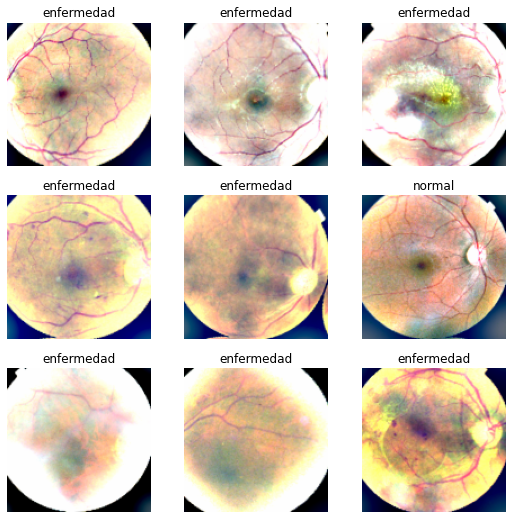

In [33]:
dls.show_batch()

In [34]:
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=20),
    SaveModelCallback(fname='modelResnet18')  
]

In [35]:
learn = cnn_learner(dls,resnet18,metrics=accuracy,cbs=callbacks).to_fp16()

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


SuggestedLRs(minimum=0.010000000149011612, steep=0.0020892962347716093, valley=0.0012022644514217973, slide=0.0063095735386013985)

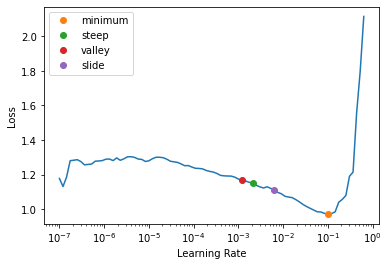

In [36]:
learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

## Entrenamos el modelo

In [30]:
learn.fine_tune(60,base_lr=1e-2)

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.7/dist-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


TypeError: ignored

Exportamos el modelo

In [ ]:
learn.to_fp32()
learn.export('modeloBinario.pkl')

## Evaluando el modelo

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))
dlsTest = dbTest.dataloaders(path,bs=128)

In [ ]:
learn.dls = dlsTest

El valor de la función de perdida es de 0.34 y su accuracy es del 86.5%.

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.8656250238418579.


(#2) [0.3400197923183441,0.8656250238418579]

## Interpretación del modelo

In [ ]:
learn.dls=dls

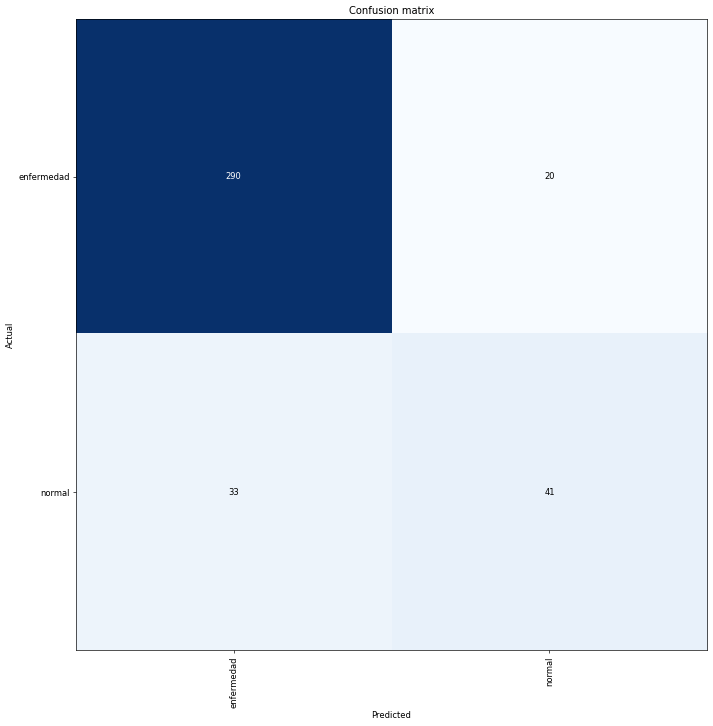

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

# Clasificador Sin Procesar Imágenes

In [ ]:
from fastai.vision.all import *

In [ ]:
!wget https://www.dropbox.com/s/1isaa8xrrv0x6n4/datasetComprimido.zip?dl=0 --no-verbose -O datasetComp.zip

2022-06-14 17:42:16 URL:https://ucae6fc7287d1c8cea5141ecb57b.dl.dropboxusercontent.com/cd/0/inline2/BnMskXE0fUadaU01YBI0-rr_gyjY1J0Zl2J7IwTbVyNpYLcp46whJxRhdq_WdkImon9BRH5lSCZ2jftKJ0qnH6_S8Wqt-O4q6hqJNyK_KhytPNE3khU48cHkoarpCt4uEy5K5Tk8wsQfwZrHT0ApL1LH3jcFoxVyNo_4cf1QWIxIrlIi0_thvIsa-uYftMOWuLJRVPIz7gkTiG0AdOoplCp7wpxy5G1raItw0Fmi8BZyA3oADE1_bYe6ayavr8Z9tUr0T841EVrdAq2yS1s1LULNXNLyierfVQtFZS8EFyXbhOOZf5RI9MWcqhSANl19_ZMVJkgqGfmtlC7yk2f0JLb-V9qOW_qpdhHkN0913y-pqW-3Rr-dCitCc-hK6ucKzvXdVS-Np9fpSoUbPpB4DnaaxE5n9g4ko_7qTBFZSERIvg/file [144922725/144922725] -> "datasetComp.zip" [1]


In [ ]:
!unzip -qq datasetComp.zip

In [ ]:
trainPath = Path('Training_Set_C/')
testPath  = Path('Test_Set_C/')
valPath  =  Path('Evaluation_Set_C/')

In [ ]:
df_train = pd.read_csv(str(trainPath) + '/train.csv')
df_test = pd.read_csv(str(testPath) + '/test.csv')
df_val = pd.read_csv(str(valPath) + '/val.csv')

In [ ]:
import shutil
for id, enf in zip(df_train['ID'], df_train['Disease_Risk']):
    if(int(enf)==0):
        shutil.move(str(trainPath)+'/Training/' + str(id) + '.png', trainN)
    else:
        shutil.move(str(trainPath)+'/Training/' + str(id) + '.png', trainE)

for id, enf in zip(df_test['ID'], df_test['Disease_Risk']):
    if(int(enf)==0):
        shutil.move(str(testPath)+'/Test/' + str(id) + '.png', testN)
    else:
        shutil.move(str(testPath)+'/Test/' + str(id) + '.png', testE)
for id, enf in zip(df_val['ID'], df_val['Disease_Risk']):
    if(int(enf)==0):
        shutil.move(str(valPath)+'/Validation/' + str(id) + '.png', valN)
    else:
        shutil.move(str(valPath)+'/Validation/' + str(id) + '.png', valE)

In [ ]:
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))

In [ ]:
trainPath = Path('dataset/train')

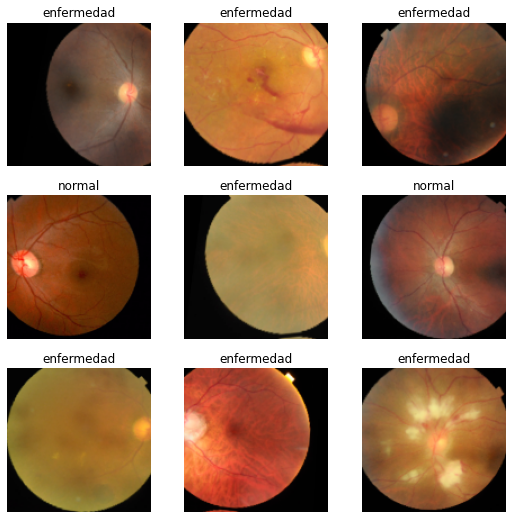

In [ ]:
dls = db.dataloaders(trainPath,bs=128)
dls.show_batch()

In [ ]:
callbacks = [
    ShowGraphCallback(),
    EarlyStoppingCallback(patience=20),
    SaveModelCallback(fname='modelResnet18')  
]

In [ ]:
learn = cnn_learner(dls,resnet18,metrics=accuracy,cbs=callbacks).to_fp16()

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


SuggestedLRs(minimum=0.010000000149011612, steep=0.0002754228771664202, valley=0.0005754399462603033, slide=0.0063095735386013985)

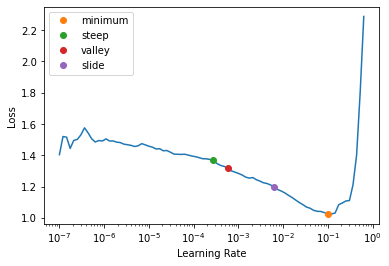

In [ ]:
learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

epoch,train_loss,valid_loss,accuracy,time
0,1.370977,1.049436,0.442708,00:09


Better model found at epoch 0 with valid_loss value: 1.0494359731674194.


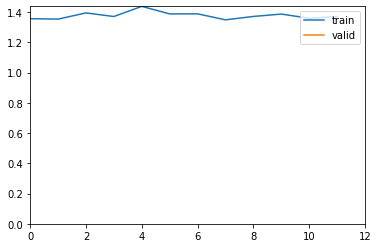

epoch,train_loss,valid_loss,accuracy,time
0,1.259107,0.934507,0.507812,00:09
1,1.216002,0.890913,0.536458,00:08
2,1.200848,0.835302,0.554688,00:06
3,1.168685,0.801865,0.562500,00:06
4,1.139372,0.757385,0.588542,00:06
5,1.108600,0.717237,0.619792,00:06
6,1.089646,0.679297,0.664062,00:06
7,1.065431,0.677282,0.687500,00:06
8,1.057576,0.646228,0.703125,00:06
9,1.038068,0.642446,0.710938,00:06


Better model found at epoch 0 with valid_loss value: 0.9345065951347351.


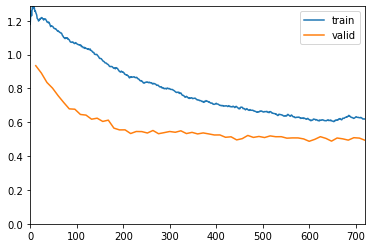

Better model found at epoch 1 with valid_loss value: 0.8909130096435547.
Better model found at epoch 2 with valid_loss value: 0.83530193567276.
Better model found at epoch 3 with valid_loss value: 0.8018649220466614.
Better model found at epoch 4 with valid_loss value: 0.7573845982551575.
Better model found at epoch 5 with valid_loss value: 0.7172372937202454.
Better model found at epoch 6 with valid_loss value: 0.6792972087860107.
Better model found at epoch 7 with valid_loss value: 0.6772815585136414.
Better model found at epoch 8 with valid_loss value: 0.6462276577949524.
Better model found at epoch 9 with valid_loss value: 0.6424462199211121.
Better model found at epoch 10 with valid_loss value: 0.6182074546813965.
Better model found at epoch 12 with valid_loss value: 0.6049867272377014.
Better model found at epoch 14 with valid_loss value: 0.5654913187026978.
Better model found at epoch 15 with valid_loss value: 0.5549833178520203.
Better model found at epoch 17 with valid_loss va

In [ ]:
#tiempo de entrenamiento 8 minutos
learn.fine_tune(60,base_lr=1e-4)

## Evaluacion

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))

path = Path('dataset/')
dlsTest = dbTest.dataloaders(path,bs=128)
learn.dls = dlsTest

In [ ]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.546875.


(#2) [0.8011258840560913,0.546875]